### Imports Necesarios

In [1]:
#!pip install kagglehub
#!pip install matplotlib
#!pip install seaborn
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd
import numpy as np
import random
#!pip install setuptools
#!pip install setuptools distutils
#!pip install tensorflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

c:\Users\domid\Desktop\PIA\mi_entorno\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Importamos el Dataset y lo pasamos a Dataframe

In [2]:
# Install dependencies as needed:
#!pip install kagglehub[pandas-datasets]
# Set the path to the file you'd like to load
file_path = "Datos.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fjcob1/idealista-madrid",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

#display("Primeros 5 registros:", df.head())

C:\Users\domid\AppData\Local\Temp\ipykernel_9976\472550485.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


# 1. Introducción

### Introducción de los Datos
* provincia: Provincia
* zona: zona
* título: Breve descripción de la oferta.
* PrecioActual: Precio de venta actual.
* PrecioAnterior: Precio de la oferta anterior.
* metros: metros cuadrados.
* habitaciones: número de habitaciones.
* ascensor: si se indica que tenga o no ascensor.
* localización: Interior, exterior,…
* planta: número de planta.
* baños: número de baños.
* tags: etiquetas relevantes dependiendo de lo indicado en la oferta.
* descripción: descripción de la oferta de venta.
* Enlace: enlace a la oferta.

### Vemos el tipo de dato de los campos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11826 entries, 0 to 11825
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   provincia       11826 non-null  object 
 1   zona            11826 non-null  object 
 2   titulo          11826 non-null  object 
 3   PrecioActual    11826 non-null  int64  
 4   PrecioAnterior  11826 non-null  int64  
 5   metros          11826 non-null  int64  
 6   habitaciones    11460 non-null  float64
 7   ascensor        11033 non-null  object 
 8   localizacion    10730 non-null  object 
 9   planta          10601 non-null  object 
 10  baños           11826 non-null  int64  
 11  tags            11664 non-null  object 
 12  descripcion     11761 non-null  object 
 13  Enlace          11826 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.3+ MB


### Vemos cuantos valores únicos hay de la columna provincia para asegurarnos antes de borrarla

In [4]:
df['provincia'].unique()

array(['madrid'], dtype=object)

### Vemos cuantos valores "0" hay de la columna PrecioAnterior para asegurarnos antes de borrarla

In [5]:
total_registros = len(df)

valores_cero = (df['PrecioAnterior'] == 0).sum()

print(f"Total de registros: {total_registros}")
print(f"Valores iguales a 0 en 'PrecioAnterior': {valores_cero}")

Total de registros: 11826
Valores iguales a 0 en 'PrecioAnterior': 10713


### Nuestra variable objetivo va a ser el PrecioActual de la vivienda y de momento vamos a eliminar las columnas que no son relevantes para nuetro modelo:
* provincia
* PrecioAnterior
* Enlace (no aporta nada), pero no lo vamos a borrar para comprobar la calidad y veracidad de los datos mas adelante

In [6]:
try:
    df.drop(columns=['provincia', 'PrecioAnterior',], inplace=True)
    print("Columnas eliminadas correctamente.")
except KeyError as e:
    print(f"No se pudieron eliminar algunas columnas porque no existen(ya se han eliminado): {e}")
display(df.head())

Columnas eliminadas correctamente.


,zona,titulo,PrecioActual,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",355000,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",149000,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",195000,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",195000,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,tetuan,"Dúplex en Bellas Vistas, Madrid",715000,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


# 2. Análisis de la calidad de los datos

### Una vez hayamos terminado con el análisis de calidad de los datos, podemos eliminar nuestra columna Enlace, que era la que nos ayudaba a contrarrestrar la información de los datos raros.

In [7]:
# Vamos a poner el PrecioActual como la primera columna por comodidad
df = df[['PrecioActual'] + [col for col in df.columns if col != 'PrecioActual']]
display(df.head())

,PrecioActual,zona,titulo,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,355000,ciudad-lineal,"Piso en calle de San Marcelo, 22, Ventas, Madrid",69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,149000,carabanchel,"Piso en calle Cabo Nicolás Mur, San Isidro, Ma...",91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,195000,centro,"Piso en calle de Rodas, Lavapiés-Embajadores, ...",36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,195000,usera,"Piso en calle de Ferroviarios, Almendrales, Ma...",58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,715000,tetuan,"Dúplex en Bellas Vistas, Madrid",140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


### Funcion que vamos a usar para analizar las columnas

In [8]:
# En primer lugar vamos definir una función que nos ayudará a analizar las columnas de un dataframe
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, ':',v, "veces")

## 2.1 *Columna zona*

### Usamos la funcion describe_columna para comprobar si hay nulos, los número de valores distintos y comprobar los valores mas frecuentes

In [9]:
describe_columna(df, "zona")

Columna: zona  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 21
Valores más frecuentes:
barrio-de-salamanca : 2018 veces
centro : 1890 veces
chamberi : 796 veces
chamartin : 706 veces
tetuan : 596 veces
moncloa : 580 veces
carabanchel : 567 veces
ciudad-lineal : 537 veces
puente-de-vallecas : 526 veces
retiro : 508 veces


In [10]:
df["zona"].unique()

array(['ciudad-lineal', 'carabanchel', 'centro', 'usera', 'tetuan',
       'arganzuela', 'barrio-de-salamanca', 'puente-de-vallecas',
       'moncloa', 'chamberi', 'chamartin', 'villaverde', 'fuencarral',
       'retiro', 'moratalaz', 'hortaleza', 'san-blas', 'latina',
       'barajas', 'villa-de-vallecas', 'vicalvaro'], dtype=object)

### nos puede valer para tener en cuenta a la hora de escalar los datos en los siguientes pasos

### zona enfrentado al PrecioActual

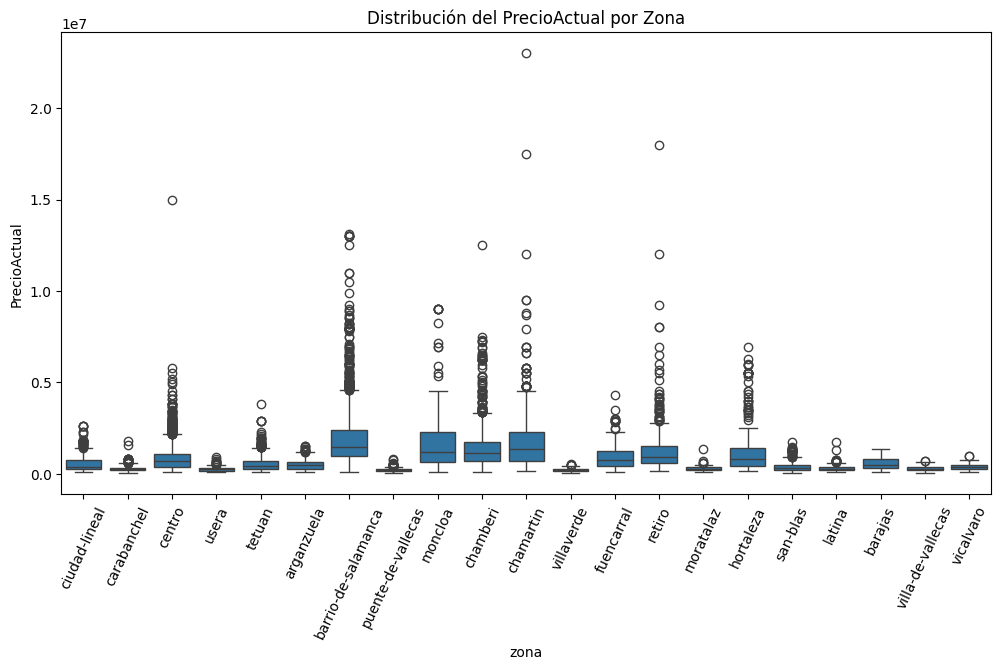

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="zona", y="PrecioActual", data=df)
plt.xticks(rotation=65)  # Rotar etiquetas para mejor lectura
plt.title("Distribución del PrecioActual por Zona")
plt.show()

### media de precio de vivienda por zonas

In [12]:
media_precio_por_zona = df.groupby("zona")["PrecioActual"].mean().sort_values(ascending=False)

# Formatear los valores sin notación científica y con separador de miles
media_precio_por_zona = media_precio_por_zona.apply(lambda x: f"{x:.3f}")

display(media_precio_por_zona)

zona
barrio-de-salamanca    1966802.046
chamartin              1767126.296
moncloa                1620871.172
chamberi               1498335.730
retiro                 1310153.789
hortaleza              1190754.570
fuencarral              892204.092
centro                  862305.902
tetuan                  577428.998
barajas                 555625.660
ciudad-lineal           542408.108
arganzuela              484212.350
san-blas                401028.385
vicalvaro               356815.922
latina                  299185.233
villa-de-vallecas       298188.288
moratalaz               296772.155
carabanchel             273038.078
usera                   252341.970
villaverde              198630.583
puente-de-vallecas      191280.369
Name: PrecioActual, dtype: object

### Vemos que hay un amplio rango de precios por zonas, yendonos al extremo, en vallecas tenemos la media entorno a 191.000€ y en el barrio de salamanca en cerca de 2 millones de euros.

## 2.2 *Columna titulo* (eliminada)
### Vamos a borrarla porque no va a influenciar en el entrenamiento del modelo

In [13]:
try:
    df.drop(columns=['titulo'], inplace=True)
    print("Columna titulo eliminada correctamente.")
except KeyError as e:
    print(f"No se pudo eliminar la columna titulo o ya ha sido eliminada): {e}")
display(df.head())

Columna titulo eliminada correctamente.


,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,baños,tags,descripcion,Enlace
0,355000,ciudad-lineal,69,2.0,S,EXTERIOR,5ª,1,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,https://www.idealista.com/inmueble/106956987/
1,149000,carabanchel,91,3.0,N,EXTERIOR,1ª,0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,https://www.idealista.com/inmueble/106906044/
2,195000,centro,36,1.0,S,NaN,2ª,0,"EXCLUSIVA,ESTUDIO",ESTUDIO EN PLENO CENTRO DE MADRIDSarago Servic...,https://www.idealista.com/inmueble/107306175/
3,195000,usera,58,1.0,S,INTERIOR,BAJO,0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",https://www.idealista.com/inmueble/106325171/
4,715000,tetuan,140,3.0,S,EXTERIOR,2ª,0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",https://www.idealista.com/inmueble/106627265/


## 2.3 *Columna baños* (eliminada)
### Se ha eliminado la columna baños porque hay mas de un 90% de casos en los que esta columna muestra 0 en los baños, debe de ser un error al extraer los datos de la página de idealista

In [14]:
try:
    total_registros = len(df)

    valores_cero = (df['baños'] == 0).sum()

    print(f"Total de registros: {total_registros}")
    print(f"Valores iguales a 0 en 'baños': {valores_cero}")
    df.drop(columns=['baños'], inplace=True)
    print("Columna baños eliminada correctamente.")
except KeyError as e:
    print(f"No se pudo eliminar la columna baños o ya ha sido eliminada): {e}")

#display(df.head())

Total de registros: 11826
Valores iguales a 0 en 'baños': 9311
Columna baños eliminada correctamente.


## 2.4 *Columna metros*

In [15]:
# Vemos cuantos nulos hay en el campo metros
print("Nulos en la columna metros:",df["metros"].isnull().sum())

# Hacemos un describe para ver la informacion del campo
df["metros"].describe()

Nulos en la columna metros: 0


count    11826.000000
mean       153.790039
std        766.217750
min         11.000000
25%         68.000000
50%        103.000000
75%        160.000000
max      75000.000000
Name: metros, dtype: float64

### Vemos que puede haber precios muy diferentes aunque la media se establece en 153m², vemos en max que hay una casa en venta con 75000m², vamos a buscarla

In [16]:
registro_maximo = df.loc[df["metros"] == 75000]
display(registro_maximo)

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
6979,192000,ciudad-lineal,75000,3.0,N,EXTERIOR,1ª,"VIVIENDA,INMOBILIARIA",VIVIENDA OCUPADASe admiten ofertas***SIN COMIS...,https://www.idealista.com/inmueble/107196960/


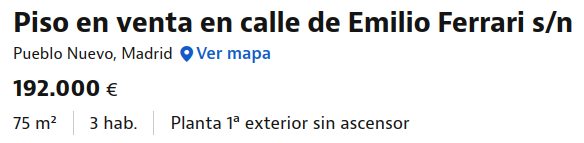

### Entrando en el enlace vemos que no son 75000m², sino 75, entonces vamos a hacer una pequeña funcion para buscar estos posibles casos

In [17]:
# Filtrar los pisos con más de 150 metros cuadrados y menos de 300000 en PrecioActual
df_filtrado = df[(df['metros'] > 150) & (df['PrecioActual'] < 300000)]

# Seleccionar las columnas de interés
df_resultado = df_filtrado[['PrecioActual', 'metros', 'Enlace']]

# Mostrar el resultado
display(df_resultado)

,PrecioActual,metros,Enlace
744,190000,243,https://www.idealista.com/inmueble/107240336/
2714,114500,811,https://www.idealista.com/inmueble/107028561/
3231,170000,160,https://www.idealista.com/inmueble/106315139/
5762,286000,155,https://www.idealista.com/inmueble/107016847/
6979,192000,75000,https://www.idealista.com/inmueble/107196960/
7456,290000,171,https://www.idealista.com/inmueble/102922637/
7750,161000,479,https://www.idealista.com/inmueble/101241888/
8106,286000,154,https://www.idealista.com/inmueble/106631131/
10181,290000,160,https://www.idealista.com/inmueble/107261187/
10821,232000,159,https://www.idealista.com/inmueble/106463321/


| Columna | Precio | Metros | Acción |
|---------|--------|--------|--------|
| 744     | Está bien | Está bien | Se dejará tal como está |
| 2714    | Está bien | 41     | Se cambiará el valor de la columna metros |
| 3231    | Está bien | Está bien | Se dejará tal como está |
| 5762    | Está bien | Está bien | Se dejará tal como está |
| 6979    | Está bien | 75     | Se cambiará el valor de la columna metros |
| 7456    | Está bien | Está bien | Se dejará tal como está |
| 7750    | Está bien | 83     | Se cambiará el valor de la columna metros |
| 8106    | Está bien | Está bien | Se dejará tal como está |
| 10181   | Está bien | Está bien | Se dejará tal como está |
| 10821   | Está bien | Está bien | Se dejará tal como está |

### También vamos a filtrar este caso especial

In [18]:
# Filtrar los pisos con más de 9000 metros cuadrados y menos de 2000000000 en PrecioActual
df_filtrado = df[(df['metros'] > 9000) & (df['PrecioActual'] < 2000000000)]

# Seleccionar las columnas de interés
df_resultado = df_filtrado[['PrecioActual', 'metros', 'Enlace']]

# Mostrar el resultado
display(df_resultado)

,PrecioActual,metros,Enlace
6979,192000,75000,https://www.idealista.com/inmueble/107196960/
7997,1495000,33175,https://www.idealista.com/inmueble/106105382/


### El primero ya lo vimos en las comprobaciones de arriba y el segundo los metros son 332m² no 7997m²

In [19]:
# Lista de los índices y las correcciones a hacer según la tabla de comprobaciones
correcciones = {
    744: None,    # Se dejará tal como está
    2714: 41,     # Se cambiará el valor de la columna metros a 41
    3231: None,   # Se dejará tal como está
    5762: None,   # Se dejará tal como está
    6979: 75,     # Se cambiará el valor de la columna metros a 75
    7456: None,   # Se dejará tal como está
    7750: 83,     # Se cambiará el valor de la columna metros a 83
    8106: None,   # Se dejará tal como está
    10181: None,  # Se dejará tal como está
    10821: None,  # Se dejará tal como está
    7997: 332     # Cambiar el valor de la columna metros a 332 (corrigiendo el error de 33175)
}

# Aplicar las correcciones usando iloc
for indice, metros_nuevos in correcciones.items():
    if metros_nuevos is not None:
        # Actualizamos los metros solo si es necesario
        df.iloc[indice, df.columns.get_loc('metros')] = metros_nuevos

# Mostrar algunas filas para verificar las modificaciones
display(df.iloc[[2714, 6979, 7750, 7997]])  # Verifica las filas modificadas

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
2714,114500,puente-de-vallecas,41,NaN,NaN,NaN,BAJO,"PISO,FUNCIONAL","Funcional piso en Madrid, ideal para parejas. ...",https://www.idealista.com/inmueble/107028561/
6979,192000,ciudad-lineal,75,3.0,N,EXTERIOR,1ª,"VIVIENDA,INMOBILIARIA",VIVIENDA OCUPADASe admiten ofertas***SIN COMIS...,https://www.idealista.com/inmueble/107196960/
7750,161000,puente-de-vallecas,83,3.0,N,NaN,4ª,"VIVIENDA,PISO,LUMINOSO,HOGAR,FUNCIONAL",Presentamos este encantador piso de segunda ma...,https://www.idealista.com/inmueble/101241888/
7997,1495000,hortaleza,332,7.0,NaN,NaN,NaN,"AMPLIO,EXCLUSIVA,OPORTUNIDAD,CHALET,REFORMAR,M...",Este fantástico pareado se encuentra en Piover...,https://www.idealista.com/inmueble/106105382/


## 2.5 *Columna habitaciones*

### comprobamos los nulos o si está rellenado con 0 habitaciones

In [20]:
describe_columna(df, "habitaciones")

habitaciones0 = (df["habitaciones"] == 0).sum()
print("con el campo habitaciones = 0 -->",habitaciones0)

# Eliminar filas donde "habitaciones" es nulo
df = df.dropna(subset=["habitaciones"])


Columna: habitaciones  -  Tipo de datos: float64
Número de valores nulos: 366  -  Número de valores distintos: 17
Valores más frecuentes:
3.0 : 3768 veces
2.0 : 3383 veces
1.0 : 1624 veces
4.0 : 1490 veces
5.0 : 690 veces
6.0 : 291 veces
7.0 : 102 veces
8.0 : 48 veces
9.0 : 26 veces
10.0 : 15 veces
con el campo habitaciones = 0 --> 0


### Tambien vamos a comprobar si hay muchas habitaciones en una vivienda, por si está mal este campo enfrentandola a un precio menor a 700000

In [21]:
habitacionesraras = df[(df['habitaciones'] >= 7) & (df['PrecioActual'] < 700000)]
display(habitacionesraras)

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,Enlace
40,128000,san-blas,59,20.0,N,EXTERIOR,BAJO,"VIVIENDA,FINCA",Especial Inversores. Se vende ALQUILADO A TERC...,https://www.idealista.com/inmueble/106562409/
4471,650000,centro,181,7.0,S,EXTERIOR,2ª,"ÁTICO,OPORTUNIDAD",*OPORTUNIDAD PARA INVERSORES EN EL CORAZÓN DE ...,https://www.idealista.com/inmueble/107092719/
5926,450000,chamberi,111,9.0,S,INTERIOR,BAJO,"VIVIENDA,EXCLUSIVA,OPORTUNIDAD","¡ATENCIÓN INVERSORES, OPORTUNIDAD ÚNICA!Se tra...",https://www.idealista.com/inmueble/106936358/
6187,429000,barajas,135,8.0,NaN,NaN,NaN,CASA,VOhome propiedades Barajas vende casa en el Ca...,https://www.idealista.com/inmueble/105171402/
6579,490000,usera,150,9.0,N,EXTERIOR,4ª,"DÚPLEX,FUNCIONAL",¡Descubre este increíble dúplex en venta que r...,https://www.idealista.com/inmueble/107153509/
7661,293000,puente-de-vallecas,124,7.0,N,EXTERIOR,BAJO,"DÚPLEX,AMUEBLADA,ELECTRODOMÉSTICOS",NO COBRAMOS AL COMPRADORDúplex en rentabilidad...,https://www.idealista.com/inmueble/106505862/
11805,650000,centro,134,7.0,N,EXTERIOR,1ª,"PISO,BALCONES,INTERIOR",Se vende sin comisión de agencia piso amueblad...,https://www.idealista.com/inmueble/106907623/


#### Parece estar todo correcto viendo el Enlace de estos casos

## 2.6 *Columna planta*
### Hacemos el describe para ver la información y pensar que hacer

In [22]:
describe_columna(df, "planta")

Columna: planta  -  Tipo de datos: object
Número de valores nulos: 1214  -  Número de valores distintos: 27
Valores más frecuentes:
1ª : 2047 veces
2ª : 1720 veces
3ª : 1529 veces
BAJO : 1400 veces
4ª : 1243 veces
5ª : 785 veces
6ª : 570 veces
7ª : 286 veces
ENTREPLANTA : 156 veces
8ª : 123 veces


### Las conclusiones son al final borrar estos registros porque si le incluyo a estos nulos una categoria como "Desconocido" creo que puede influenciar en el calculo del modelo porque parece que va a estar muy ligada al precio de esta columna, y no podemos tener una columna como "Desconocido" que tenga mas valores que muchas otras categorías (1ª, 2ª, 3ª Entreplanta y sótano)

In [23]:
df.dropna(subset=['planta'], inplace=True)

## 2.7 *Columna ascensor*
### Hacemos el describe para ver la información y pensar que hacer

In [24]:
describe_columna(df, "ascensor")

Columna: ascensor  -  Tipo de datos: object
Número de valores nulos: 42  -  Número de valores distintos: 2
Valores más frecuentes:
S : 7951 veces
N : 2253 veces


### Para no borrar esos 55 datos nulos, podemos rellenar con lo que tenemos claro por la ley 010 que dice que a partir de cinco pisos es obligatorio instalar al menos un ascensor en el edificio y los demás casos estudiarlos

In [25]:
# Filtrar los registros con valores nulos en la columna 'ascensor'
nulos_ascensor = df[df['ascensor'].isna()]

# Contar los nulos en la columna 'ascensor' donde 'planta' es menor o igual a 4ª (opcional)
nulos_bajo_5 = nulos_ascensor[nulos_ascensor['planta'] <= '4ª'].shape[0]

# Contar los nulos en la columna 'ascensor' donde 'planta' es mayor o igual a 5ª (obligatorio tener ascensor)
nulos_arriba_5 = nulos_ascensor[nulos_ascensor['planta'] >= '5ª'].shape[0]

# Mostrar los resultados
print(f"Nulos en 'ascensor' con planta >= 5ª (obligatorio): {nulos_arriba_5}")
print(f"Nulos en 'ascensor' con planta <= 4ª (opcional): {nulos_bajo_5}")

Nulos en 'ascensor' con planta >= 5ª (obligatorio): 16
Nulos en 'ascensor' con planta <= 4ª (opcional): 26


### A esos 16 se las va añadir que si tienen ascensor "S" y a los 26 los eliminamos:

In [26]:
# Para los registros con planta >= 5ª y 'ascensor' nulo, asignar 'S' en la columna 'ascensor' (indicando que tiene ascensor)
df.loc[(df['planta'] >= '5ª') & (df['ascensor'].isna()), 'ascensor'] = 'S'

# Eliminar los registros con 'ascensor' nulo y planta <= 4ª
df = df[~((df['planta'] <= '4ª') & (df['ascensor'].isna()))]

# Mostrar la cantidad de registros después de eliminar los nulos
print(f"Registros después de eliminar los nulos en 'ascensor' con planta <= 4ª: {df.shape[0]}")

Registros después de eliminar los nulos en 'ascensor' con planta <= 4ª: 10220


## 2.8 *Columna localizacion*
### Hacemos el describe para ver la información y pensar que hacer

In [27]:
describe_columna(df, "localizacion")

Columna: localizacion  -  Tipo de datos: object
Número de valores nulos: 130  -  Número de valores distintos: 2
Valores más frecuentes:
EXTERIOR : 8609 veces
INTERIOR : 1481 veces


### Vamos a eliminar esos 140 porque nos comviene tener solo dos valores para dividir 0 y en 1

In [28]:
# Eliminar registros donde 'localizacion' es nulo
df = df.dropna(subset=['localizacion'])
print(df['localizacion'].isna().sum())  # Debería ser 0
print(df['localizacion'].unique())  # Debería mostrar solo 'EXTERIOR' e 'INTERIOR'

0
['EXTERIOR' 'INTERIOR']


## 2.9 *Columna tags*
### Hacemos el describe para ver la información y pensar que hacer

In [29]:
describe_columna(df, "tags")

Columna: tags  -  Tipo de datos: object
Número de valores nulos: 129  -  Número de valores distintos: 7306
Valores más frecuentes:
PISO,OPORTUNIDAD : 93 veces
VIVIENDA : 90 veces
PISO : 87 veces
OPORTUNIDAD : 62 veces
VIVIENDA,PISO : 57 veces
PISO,METRO : 32 veces
VIVIENDA,OPORTUNIDAD : 28 veces
VIVIENDA,PISO,EXTERIOR : 26 veces
PISO,REFORMADO,EXTERIOR,INTERIOR : 26 veces
VIVIENDA,PISO,OPORTUNIDAD : 25 veces


### Hay muchas etiquetas aqui, 7569, lo que podemos hacer es quedarnos con las mas frecuentes, para no eliminar esta columna, porque puede ser valiosa.

In [30]:
# Contar la cantidad de veces que aparece cada combinación de tags
tags_frecuencia = df['tags'].value_counts()

# Mostrar las 20 combinaciones más comunes
print(tags_frecuencia.head(30))

tags
PISO,OPORTUNIDAD                         93
VIVIENDA                                 90
PISO                                     87
OPORTUNIDAD                              62
VIVIENDA,PISO                            57
PISO,METRO                               32
VIVIENDA,OPORTUNIDAD                     28
VIVIENDA,PISO,EXTERIOR                   26
PISO,REFORMADO,EXTERIOR,INTERIOR         26
VIVIENDA,PISO,OPORTUNIDAD                25
VIVIENDA,METRO                           25
VIVIENDA,PISCINA,GARAJE                  23
OPORTUNIDAD,INTERIOR                     22
VIVIENDA,PISO,METRO                      22
PISO,REFORMADO                           21
PISO,REFORMADO,FINCA,INTERIOR            20
PISO,HOGAR,NUEVO                         19
VIVIENDA,OPORTUNIDAD,NUEVO               19
VIVIENDA,TERRAZA,LUJO,PISCINA,JARDÍN     16
APARTAMENTO                              16
VIVIENDA,URBANIZACIÓN                    15
VIVIENDA,FINCA                           15
METRO                      

### De esto podemos sacar varias conclusiones:
* "PISO" (5,683 veces) y "VIVIENDA" (5,040 veces) son los más comunes.
* Otros muy usados son "EXTERIOR" (2,405), "METRO" (2,039) y "AMPLIO" (1,828).
* Información dentro de los tags: Ubicación y entorno: "EXTERIOR", "METRO", "VISTAS". | Estado y calidad: "REFORMADO", "NUEVO", "FINCA". | Extras atractivos: "TERRAZA", "LUJO", "ÁTICO".
### Y lo que podemos  hacer es:
* Convertir los tags más frecuentes en variables binarias (0 o 1):
* Eliminar tags muy genéricos ("PISO", "VIVIENDA"), porque no aportan información útil.
### ESO LO HAREMOS EN EL PREPROCESADO DE LOS DATOS, DESPUÉS DE HACER UN ANÁLISIS EXPLORATORIO DE LOS DATOS (SIGUIENTE PASO)

## 2.10 *Columna descripcion*
### Hacemos el describe para ver la información y pensar que hacer

In [31]:
describe_columna(df, "descripcion")

Columna: descripcion  -  Tipo de datos: object
Número de valores nulos: 52  -  Número de valores distintos: 9372
Valores más frecuentes:
OBRA NUEVA DE VIVIENDAS TURÍSTICAS DE LUJO E INTELIGENTES EN VALDEMARIN.48 VIVIENDAS de 1 DORMITORIO, CON LAS MAXIMAS CALIDADES, amplias terrazas y zonas verdes, así como piscinas privadas en plantas altas y bajas.URBANIZACION CON MULTITUD DE SERVICIOS:•Jardín y piscina colectiva.•Piscina Infinity climatizada d : 16 veces
OPORTUNIDAD INMUEBLE SIN POSESIÓN, NO SE PUEDE VISITAR, PROPIO PARA INVERSORES O VECINOS QUE CONOZCAN EL INMUEBLE.Disponemos de una amplia cartera de inmuebles sin posesión en Madrid y en toda España, PROPIO PEQUEÑO Y GRAN INVERSOR.Madrid es un municipio y una ciudad de España.La localidad, con categoría histórica : 15 veces
Hemos creado un concepto muy exclusivo con interiores abiertos y cálidos con los que se pretende conseguir confort y calidad de vida para aquellos que puedan disfrutarlo.Este singular proyecto se encuentra ubicad

### vamos a transformar la columna descripcion en una representación numérica utilizando la técnica de TF-IDF (Term Frequency-Inverse Document Frequency).
#### convertimos los textos de las descripciones en una matriz de características que se puede usar para entrenar nuestro modelo. (LO HAREMOS MAS ADELANTE en el preprocesado de los datos)

In [32]:
df.drop(columns=["Enlace"], inplace=True) # Nos ayuda solo para validar los datos mirando en los anuncios, no lo vamos a incorporar en el modelo

# 3. Preprocesado de los datos

#### Copiaremos el dataframe para no perder el original por si lo queremos usar mas adelante

In [33]:
df_Xescalado = df.copy()
 

## 3.1 Para la columna zona:
* Vamos a crear una columna adicional con la media de precios por zonas calculadas en el apartado anterior.
* Vamos a codificar la columna zona con one-hot-encoding (Veo que es el más indicado, aunque nos añada más columnas)

In [34]:
from sklearn.preprocessing import LabelEncoder

# Diccionario de precios medios por zona
zona_media_precio = {
    'barrio-de-salamanca': 1966802.046,
    'chamartin': 1767126.296,
    'moncloa': 1620871.172,
    'chamberi': 1498335.730,
    'retiro': 1310153.789,
    'hortaleza': 1190754.570,
    'fuencarral': 892204.092,
    'centro': 862305.902,
    'tetuan': 577428.998,
    'barajas': 555625.660,
    'ciudad-lineal': 542408.108,
    'arganzuela': 484212.350,
    'san-blas': 401028.385,
    'vicalvaro': 356815.922,
    'latina': 299185.233,
    'villa-de-vallecas': 298188.288,
    'moratalaz': 296772.155,
    'carabanchel': 273038.078,
    'usera': 252341.970,
    'villaverde': 198630.583,
    'puente-de-vallecas': 191280.369
}

# Verificar zonas que no están en el diccionario
zonas_no_encontradas = df_Xescalado[~df_Xescalado['zona'].isin(zona_media_precio.keys())]

# Mostrar las zonas que no están en el diccionario
print("Zonas no encontradas en el diccionario:", zonas_no_encontradas['zona'].unique())

# Asignar el precio medio de cada zona a la nueva columna 'zona_media_precio'
df_Xescalado['zona_media_precio'] = df_Xescalado['zona'].map(zona_media_precio)

# Reemplazar valores NaN con un valor específico o eliminarlos (si lo prefieres)
df_Xescalado['zona_media_precio'].fillna(np.nan, inplace=True)

# Aplicar Label Encoding a la columna 'zona'
# Usamos LabelEncoder de sklearn para convertir las zonas categóricas a números
label_encoder = LabelEncoder()
df_Xescalado['zona'] = label_encoder.fit_transform(df_Xescalado['zona'])

# Verificar los tipos de datos después de la asignación
print(df_Xescalado.dtypes)

# Verificar el resultado
display(df_Xescalado.head())

Zonas no encontradas en el diccionario: []
PrecioActual           int64
zona                   int64
metros                 int64
habitaciones         float64
ascensor              object
localizacion          object
planta                object
tags                  object
descripcion           object
zona_media_precio    float64
dtype: object


C:\Users\domid\AppData\Local\Temp\ipykernel_9976\1787969519.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Xescalado['zona_media_precio'].fillna(np.nan, inplace=True)


,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,zona_media_precio
0,355000,7,69,2.0,S,EXTERIOR,5ª,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,542408.108
1,149000,3,91,3.0,N,EXTERIOR,1ª,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,273038.078
3,195000,17,58,1.0,S,INTERIOR,BAJO,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",252341.970
4,715000,16,140,3.0,S,EXTERIOR,2ª,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",577428.998
5,1257000,0,135,3.0,S,EXTERIOR,3ª,"VIVIENDA,VISTAS,PISCINA,IMPRESIONANTE,EXTERIOR",Un lugar que te cambiará la vida.Magnifico pro...,484212.350


In [35]:
# Aplicar One-Hot Encoding a la columna 'zona'
#df_Xescalado = pd.get_dummies(df_Xescalado, columns=["zona"], drop_first=True)
#df_Xescalado.drop(columns=['zona'], inplace=True)


## 3.2 Para la columna planta, vamos a transformar los datos en numérico:
* BAJO = 0
* SÓTANO le pondremos = -1
* "ENTREPLANTA" = 0.5 (para distinguirla del "BAJO")

In [36]:
df_Xescalado["planta"].unique()

array(['5ª', '1ª', 'BAJO', '2ª', '3ª', '6ª', '4ª', '16ª', '13ª', '9ª',
       '7ª', '10ª', '8ª', '14ª', '11ª', '12ª', 'ENTREPLANTA', 'SÓTANO',
       '-1', '15ª', '17ª', '20ª', '-2', '27ª', '22ª', '21ª', '18ª'],
      dtype=object)

In [37]:
#print(df_Xescalado["planta"].isna().sum())
# Ver los valores únicos en la columna 'planta' para verificar cuáles no están en el mapeo
#print(df_Xescalado['planta'].unique())
# Mapeo manual de las plantas
planta_mapping = {
    'SÓTANO': -1,
    'BAJO': 0,
    'ENTREPLANTA': 0.5,
    '1ª': 1,
    '2ª': 2,
    '3ª': 3,
    '4ª': 4,
    '5ª': 5,
    '6ª': 6,
    '7ª': 7,
    '8ª': 8,
    '9ª': 9,
    '10ª': 10,
    '11ª': 11,
    '12ª': 12,
    '13ª': 13,
    '14ª': 14,
    '15ª': 15,
    '16ª': 16,
    '17ª': 17,
    '18ª': 18,
    '20ª': 20,
    '21ª': 21,
    '22ª': 22,
    '27ª': 27,
    '-1': -1,  # Mapeo de '-1'
    '-2': -2   # Mapeo de '-2'
}

# Sustituir los valores de la columna 'planta' por los valores del mapeo
df_Xescalado['planta'] = df_Xescalado['planta'].map(planta_mapping)

# Ver el resultado
#print(df_Xescalado['planta'].head())
#print(df_Xescalado["planta"].isna().sum())

## 3.3 Para la columna ascensor

In [38]:
### Vamos a poner un 1 cuando en la columna aparezca 'S' y 0 para cuando aparezca 'N'
# Reemplazar 'S' por 1 y 'N' por 0 en la columna 'ascensor'
df_Xescalado['ascensor'] = df_Xescalado['ascensor'].replace({'S': 1, 'N': 0})

# Verificar los cambios
print(df_Xescalado[['ascensor']].head())

   ascensor
0         1
1         0
3         1
4         1
5         1


C:\Users\domid\AppData\Local\Temp\ipykernel_9976\1412868776.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Xescalado['ascensor'] = df_Xescalado['ascensor'].replace({'S': 1, 'N': 0})


## 3.4 Para la columna localizacion

In [39]:
### Vamos a poner un 1 cuando en la columna aparezca 'EXTERIOR' y 0 para cuando aparezca 'INTERIOR'
df_Xescalado['localizacion'] = df_Xescalado['localizacion'].replace({'EXTERIOR': 1, 'INTERIOR': 0})

C:\Users\domid\AppData\Local\Temp\ipykernel_9976\3869963978.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Xescalado['localizacion'] = df_Xescalado['localizacion'].replace({'EXTERIOR': 1, 'INTERIOR': 0})


In [40]:
df_Xescalado.head(5)

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,tags,descripcion,zona_media_precio
0,355000,7,69,2.0,1,1,5.0,"VIVIENDA,LUMINOSO,VISTAS,REFORMADA,PORTERO,EXT...",Particular Vende vivienda totalmente reformada...,542408.108
1,149000,3,91,3.0,0,1,1.0,"PISO,EXCLUSIVA,INMOBILIARIA,OPORTUNIDAD",Inmobiliarias Encuentro vende en exclusiva la ...,273038.078
3,195000,17,58,1.0,1,0,0.0,"VIVIENDA,HOGAR,FUNCIONAL","Esta acogedora vivienda, ubicada en una planta...",252341.970
4,715000,16,140,3.0,1,1,2.0,"TERRAZA,EXCLUSIVA,MODERNO","Maravilloso ATICO de reciente construcción, co...",577428.998
5,1257000,0,135,3.0,1,1,3.0,"VIVIENDA,VISTAS,PISCINA,IMPRESIONANTE,EXTERIOR",Un lugar que te cambiará la vida.Magnifico pro...,484212.350


## 3.5 Para la columna tags

In [41]:
# Verificar si la columna 'tags' existe en el DataFrame
if 'tags' in df_Xescalado.columns:
    # Eliminar filas donde 'tags' sea nulo
    df_Xescalado = df_Xescalado.dropna(subset=['tags'])

    # Convertir todo a string y dividir en listas
    df_Xescalado['tags'] = df_Xescalado['tags'].astype(str).apply(lambda x: x.split(','))

    # Limpiar los espacios en blanco dentro de cada tag
    df_Xescalado['tags'] = df_Xescalado['tags'].apply(lambda x: [tag.strip() for tag in x])

    # Asegurarse de que todas las entradas son listas de tags
    if not df_Xescalado['tags'].apply(lambda x: isinstance(x, list)).all():
        print("⚠ Advertencia: Algunas entradas en 'tags' no son listas.")
        df_Xescalado['tags'] = df_Xescalado['tags'].apply(lambda x: eval(x) if isinstance(x, str) else x)

    # Aplanar todos los tags en una sola lista
    todos_los_tags = [tag for sublist in df_Xescalado['tags'] for tag in sublist]

    # Contar la frecuencia de cada tag individual
    conteo_tags = Counter(todos_los_tags)

    # Convertir en DataFrame y ordenar por frecuencia
    df_conteo_tags = pd.DataFrame(conteo_tags.items(), columns=['Tag', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

    # Mostrar los 20 tags más comunes
    print(df_conteo_tags.head(20))
else:
    print("⚠ La columna 'tags' no existe en el DataFrame.")

             Tag  Frecuencia
6           PISO        5623
0       VIVIENDA        4939
5       EXTERIOR        2365
22         METRO        1957
21        AMPLIO        1803
12       TERRAZA        1758
19     REFORMADO        1721
9    OPORTUNIDAD        1470
7      EXCLUSIVA        1354
1       LUMINOSO        1325
10         HOGAR        1172
35  ESPECTACULAR        1107
8   INMOBILIARIA        1098
36         FINCA        1025
30         ÁTICO        1014
2         VISTAS         863
39          LUJO         853
20         NUEVO         833
3      REFORMADA         799
16      EQUIPADA         769


In [42]:
print(df_Xescalado.dtypes)
print("------------------------------------------------------------")
# Lista de los tags más relevantes basados en la frecuencia
tags_relevantes = ['LUJO', 'TERRAZA', 'REFORMADO', 'EXTERIOR', 'AMPLIO', 
                   'OPORTUNIDAD', 'EXCLUSIVA', 'LUMINOSO', 'HOGAR', 'INMOBILIARIA', 
                   'ESPECTACULAR', 'FINCA', 'ÁTICO', 'VISTAS', 'NUEVO', 'EQUIPADA']

# Crear columnas binarias para cada tag relevante
for tag in tags_relevantes:
    # Si la columna 'tags' ya contiene listas (no cadenas), no es necesario hacer el split
    df_Xescalado[tag] = df_Xescalado['tags'].apply(lambda x: 1 if tag in x else 0).astype(int)

# Eliminar la columna 'tags' después de crear las columnas binarias
df_Xescalado = df_Xescalado.drop(columns=['tags'])

# Verificar los tipos de datos después de la conversión
print(df_Xescalado.dtypes)

PrecioActual           int64
zona                   int64
metros                 int64
habitaciones         float64
ascensor               int64
localizacion           int64
planta               float64
tags                  object
descripcion           object
zona_media_precio    float64
dtype: object
------------------------------------------------------------
PrecioActual           int64
zona                   int64
metros                 int64
habitaciones         float64
ascensor               int64
localizacion           int64
planta               float64
descripcion           object
zona_media_precio    float64
LUJO                   int64
TERRAZA                int64
REFORMADO              int64
EXTERIOR               int64
AMPLIO                 int64
OPORTUNIDAD            int64
EXCLUSIVA              int64
LUMINOSO               int64
HOGAR                  int64
INMOBILIARIA           int64
ESPECTACULAR           int64
FINCA                  int64
ÁTICO                  int

In [43]:
# PERTENECE AL PRINCIPIO DEL PUNTO 4
# Definir las columnas a analizar
display(df_Xescalado.head())
#DEFINIDO ANTES DEL TfidfVectorizer PORQUE SINO ME COGIA LAS MISMAS COLUMNAS VARIAS VECES PROQUE ESTABAN EN LOS TOKENS de descripcion
columnas_analizar = ["PrecioActual", "metros", "habitaciones", "ascensor", "localizacion", "planta", "zona_media_precio"]

# Filtrar el DataFrame solo con esas columnas
df_seleccionado = df_Xescalado[columnas_analizar]

# Ver las primeras filas del dataset
display(df_seleccionado.head())

# Estadísticas descriptivas del dataset
display(df_seleccionado.describe())
display(df_seleccionado["zona_media_precio"])

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,descripcion,zona_media_precio,LUJO,...,EXCLUSIVA,LUMINOSO,HOGAR,INMOBILIARIA,ESPECTACULAR,FINCA,ÁTICO,VISTAS,NUEVO,EQUIPADA
0,355000,7,69,2.0,1,1,5.0,Particular Vende vivienda totalmente reformada...,542408.108,0,...,0,1,0,0,0,0,0,1,0,0
1,149000,3,91,3.0,0,1,1.0,Inmobiliarias Encuentro vende en exclusiva la ...,273038.078,0,...,1,0,0,1,0,0,0,0,0,0
3,195000,17,58,1.0,1,0,0.0,"Esta acogedora vivienda, ubicada en una planta...",252341.970,0,...,0,0,1,0,0,0,0,0,0,0
4,715000,16,140,3.0,1,1,2.0,"Maravilloso ATICO de reciente construcción, co...",577428.998,0,...,1,0,0,0,0,0,0,0,0,0
5,1257000,0,135,3.0,1,1,3.0,Un lugar que te cambiará la vida.Magnifico pro...,484212.350,0,...,0,0,0,0,0,0,0,1,0,0


,PrecioActual,metros,habitaciones,ascensor,localizacion,planta,zona_media_precio
0,355000,69,2.0,1,1,5.0,542408.108
1,149000,91,3.0,0,1,1.0,273038.078
3,195000,58,1.0,1,0,0.0,252341.970
4,715000,140,3.0,1,1,2.0,577428.998
5,1257000,135,3.0,1,1,3.0,484212.350


,PrecioActual,metros,habitaciones,ascensor,localizacion,planta,zona_media_precio
count,9.961000e+03,9961.000000,9961.000000,9961.000000,9961.000000,9961.000000,9.961000e+03
mean,1.003718e+06,127.851621,2.702640,0.784459,0.853027,2.743249,1.042733e+06
std,1.183159e+06,88.189731,1.221183,0.411217,0.354097,2.393360,6.370156e+05
min,3.350000e+04,12.000000,1.000000,0.000000,0.000000,-2.000000,1.912804e+05
25%,3.000000e+05,70.000000,2.000000,1.000000,1.000000,1.000000,4.842123e+05
50%,6.250000e+05,103.000000,3.000000,1.000000,1.000000,2.000000,8.623059e+05
75%,1.290000e+06,152.000000,3.000000,1.000000,1.000000,4.000000,1.620871e+06
max,1.800000e+07,784.000000,20.000000,1.000000,1.000000,27.000000,1.966802e+06


0        542408.108
1        273038.078
3        252341.970
4        577428.998
5        484212.350
            ...    
11821    862305.902
11822    862305.902
11823    577428.998
11824    273038.078
11825    401028.385
Name: zona_media_precio, Length: 9961, dtype: float64

## 3.6 Para la columna descripción

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Lista personalizada de palabras vacías en español
stop_words_espanol = ['de', 'la', 'en', 'y', 'el', 'los', 'del', 'que', 
                      'con', 'para', 'una', 'a', 'las', 'un', 'su', 'al']

# Configurar el vectorizador TF-IDF con la lista personalizada
tfidf = TfidfVectorizer(max_features=5000, stop_words=stop_words_espanol, token_pattern=r'\b\w+\b')

# Ajustar y transformar la columna 'descripcion' en una matriz numérica
X_tfidf = tfidf.fit_transform(df_Xescalado['descripcion'].values)

# Convertir a un DataFrame
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Unir al DataFrame original
df_Xescalado = pd.concat([df_Xescalado.reset_index(drop=True), df_tfidf], axis=1)

# Eliminar la columna original si ya no la necesitas
df_Xescalado.drop(columns=['descripcion'], inplace=True)

In [45]:
# PRUEBAS PARA SABER SI EL ORIGEN DE LAS PERDIDAS ALTAS ERAN DE ESTAS DOS COLUMNAS Y NO, NO LO ES, SIN ESTAS LA PERDIMDA ES MAYOR
#df_Xescalado.drop(columns=['descripcion'], inplace=True)
#df_Xescalado = df_Xescalado.drop(columns=['tags'])

# 4. Análisis exploratorio con herramientas visuales
* Para los datos numéricos de nuestro dataframe (Precio Actual, metros, habitaciones, ascensor, localizacion, planta y zona_media_precio)
### Hacemos el análisis de las columnas:
* PrecioActual
* metros
* habitaciones
* ascensor
* localizacion
* planta
* zona_media_precio
### Lo hacemos después del preprocesamiento porque si lo hacíamos antes, solo teníamos 2 variables numéricas, de todas formas los datos todavía no están escalados, por lo que podemos ver su "relación real" y su verdadera distribución.

In [46]:
"""
# Definir las columnas a analizar
display(df_Xescalado.head())
#DEFINIDO ANTES DEL TfidfVectorizer PORQUE SINO ME COGIA LAS MISMAS COLUMNAS VARIAS VECES PROQUE ESTABAN EN LOS TOKENS de descripcion
columnas_analizar = ["PrecioActual", "metros", "habitaciones", "ascensor", "localizacion", "planta", "zona_media_precio"]

# Filtrar el DataFrame solo con esas columnas
df_seleccionado = df_Xescalado[columnas_analizar]

# Ver las primeras filas del dataset
display(df_seleccionado.head())

# Estadísticas descriptivas del dataset
display(df_seleccionado.describe())
display(df_seleccionado["zona_media_precio"])"
"""

'\n# Definir las columnas a analizar\ndisplay(df_Xescalado.head())\n#DEFINIDO ANTES DEL TfidfVectorizer PORQUE SINO ME COGIA LAS MISMAS COLUMNAS VARIAS VECES PROQUE ESTABAN EN LOS TOKENS de descripcion\ncolumnas_analizar = ["PrecioActual", "metros", "habitaciones", "ascensor", "localizacion", "planta", "zona_media_precio"]\n\n# Filtrar el DataFrame solo con esas columnas\ndf_seleccionado = df_Xescalado[columnas_analizar]\n\n# Ver las primeras filas del dataset\ndisplay(df_seleccionado.head())\n\n# Estadísticas descriptivas del dataset\ndisplay(df_seleccionado.describe())\ndisplay(df_seleccionado["zona_media_precio"])"\n'

## 4.1 Distribución de los datos

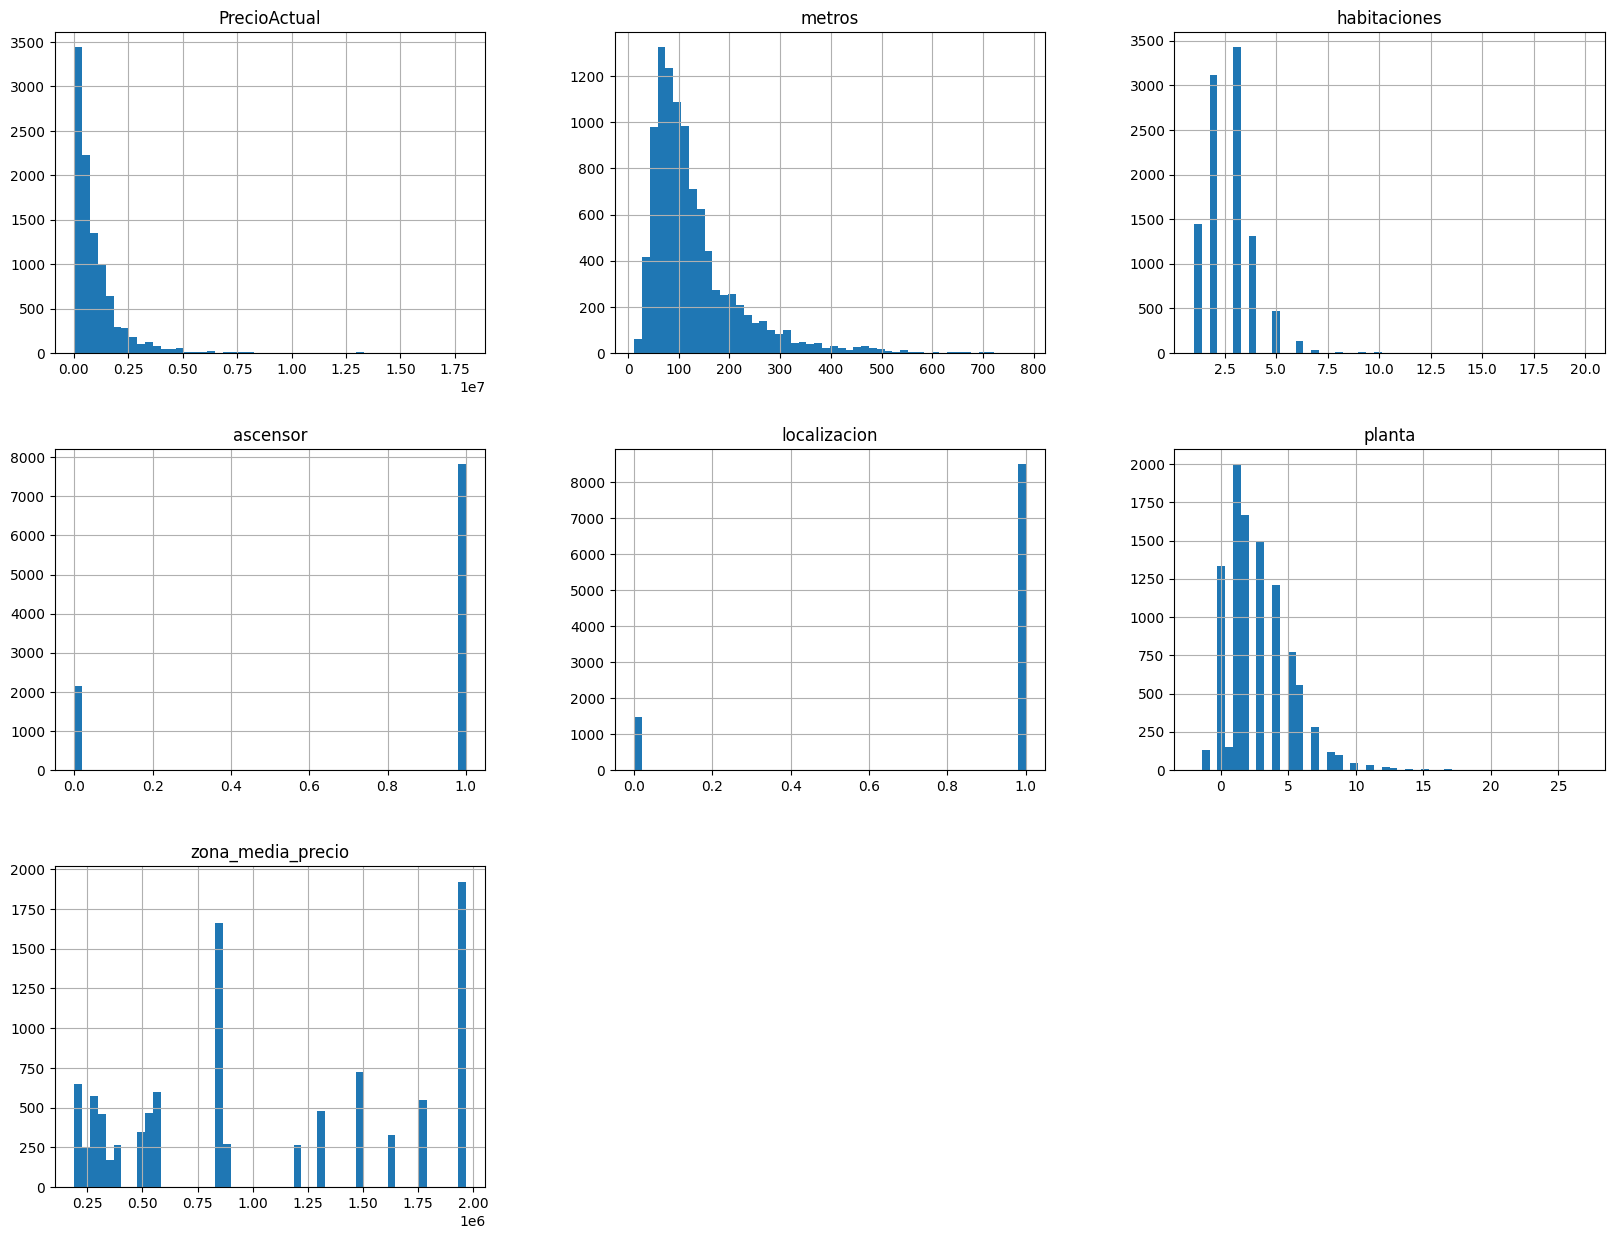

In [47]:
# Histograma de cada variable seleccionada
df_seleccionado.hist(bins=50, figsize=(20, 15))
plt.show()

### Conclusiones de la distribución:
* **PrecioActual:** Vemos que la mayoría de precios están en el rango de 0 a 2500000 (Distribución Sesgada a la Derecha). También vemos que existen outliers desde los 5 millones hasta los 17 millones y medio.
* **metros:** Se puede observar que la mayoría de los datos de esta variable están en el rango de 50 a 150, luego se ve también que hay valores más pequeños (muy pocos) y valores más altos (en mayor medida) que los veremos luego al estudiar los outliers.
* **habitaciones:** Se concentran casi todos los datos entre 2 y 3, pero también vemos pisos con más habitaciones, como vimos antes al limpiar los datos, tenemos casos que llegan hasta las 20 habitaciones. Pero no se podrían eliminar porque ya que están bien compuestas con su precio y metros, podría dar información valiosa a nuestro modelo.
* **ascensor:** Aqui vemos que hay más del doble de casas en venta con ascensor que sin ascensor.
* **localizacion:** Esta columna se dividía en EXTERIOR = 1 e INTERIOR = 0 (de madrid) y vemos que se venden más casas en el exterior de madrid a que en el interior, 5 veces más
* **planta:** De las casas que se venden podemos destacar que la mayoría tienen como número de planta: 1, pero también hay mayoría en 2 y 3, también tenemos outliers que estudiaremos más adelante.
* **zona_media_precio:** En esta columna que guarda el valor medio de precios por zonas, se puede apreciar que se venden más pisos en zonas caras que en cualquier zona, también destacar que en en valor intermedio de estas zonas, también se ve un importante número de ventas.

## 4.2 Correlación de las variables

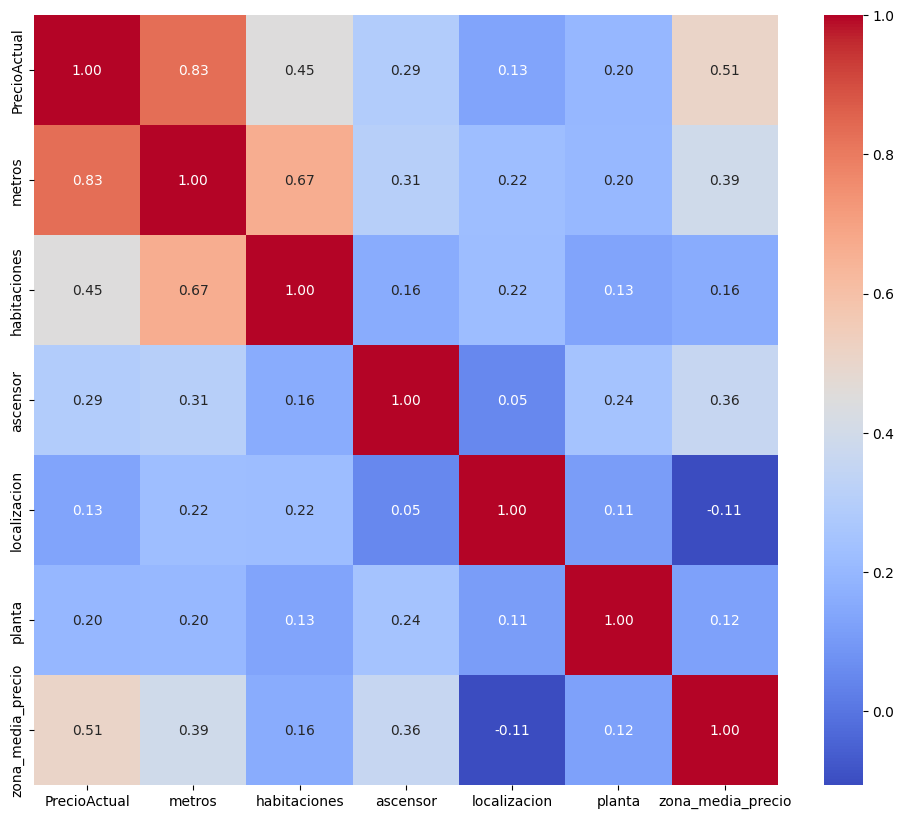

In [48]:
# Mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_seleccionado.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Conclusiones del mapa de correlación:
#### Correlación de las diferentes variables con PrecioActual (mrirando la primera fila)
* Nos encontramos la correlación mas fuerte en este mapa, con metros, tiene sentido porque el valor de la propiedad principalmente viene influenciado por los metros cuadrados.
* Las demás variable están por la media, destacando también correlaciones altas con: habitaciones y con la columna nueva que cremos (que representa la zona) zona_media_precio.
#### Correlación en general de todas las variables (mirando todo lo demás)
* Aquí se puede destacar por ejemplo la correlación que hay alta de metros con habitaciones, que tiene sentido, si se han extraido bien los datos de la página.
* Una correlación muy baja de localización (exterior e interior) con zona_media_precio

## 4.3 Búsqueda de outliers

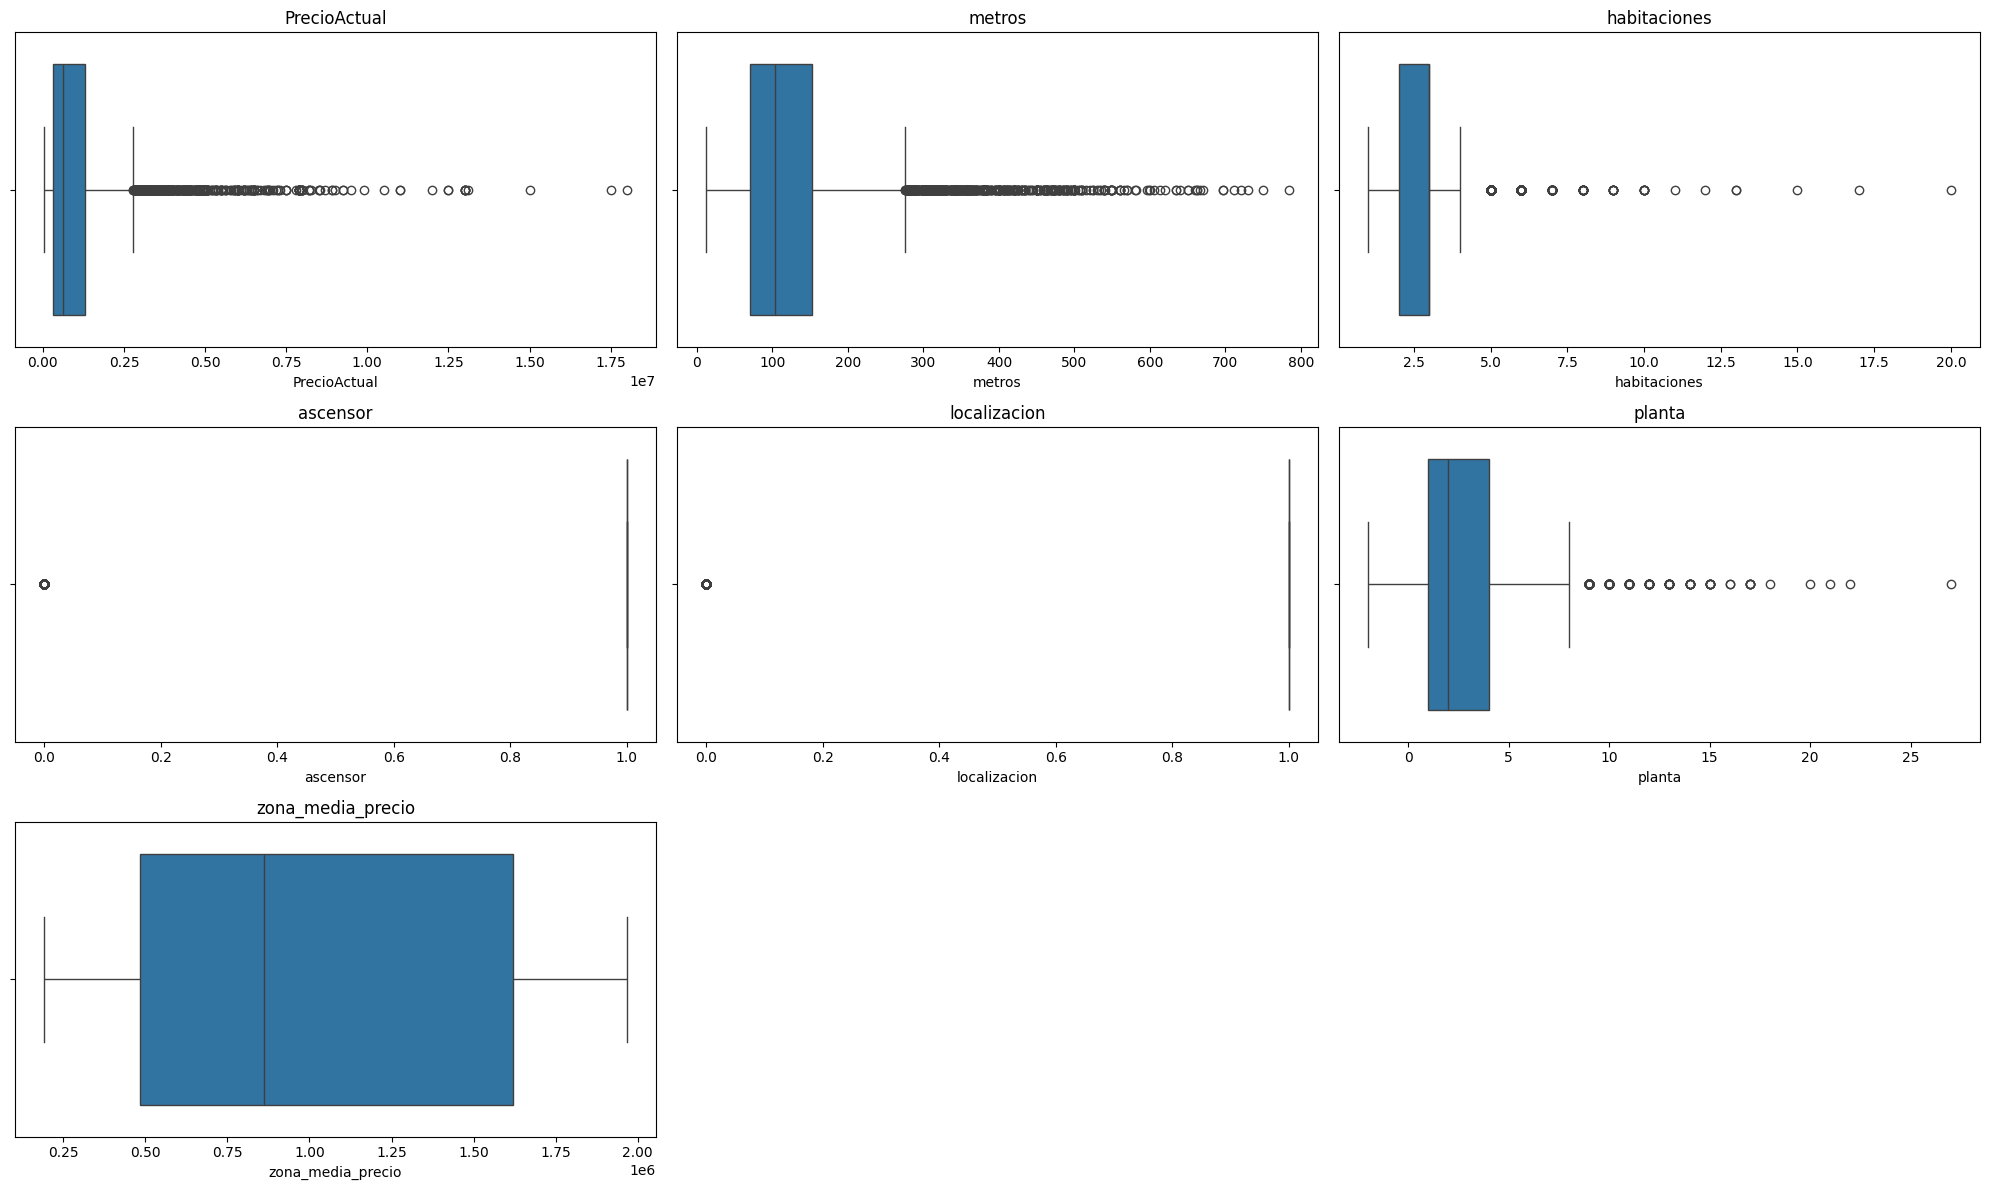

In [49]:
# Boxplot para detectar outliers
plt.figure(figsize=(20, 12))
for i, column in enumerate(df_seleccionado.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_seleccionado[column])
    plt.title(column)
plt.tight_layout()
plt.show()

### Conclusiones de los outliers
* **PrecioActual:** Como hemos estado viendo durante todo el análisis de este dataset, vemos que hay una cantidad de outliers significante en esta variable, que hay que tener en cuenta para manejarla en nuestro modelo, porque se ve claramente que se concentran estos outliers desde los 2.5Millores hasta los 18Millones
* **metros:** Para esta columna, los outliers comienzan en 300 y llegan hasta 800.
* **habitaciones:** En este caso, los outliers comienzan en 5 y llegan hasta 20
* **planta:** Aqui se concentran entre 9 y 16 aproximadamente pero también se ve un valor sobrepasar las 25 habitaciones.

# 5. Modelo con las entradas escaladas vs. Modelo sin las entradas escalas (df_no_Xescalado).

In [50]:
# Función para mostrar métricas de regresión
def mostrarMetricasRegresion(modelo, metrica, valor_metrica_entrenamiento, valor_metrica_testeo):
    print("{} : {} en los datos de entrenamiento: {:.3f}".format(modelo, metrica, valor_metrica_entrenamiento))
    print("{} : {} en los datos de testeo: {:.3f}".format(modelo, metrica, valor_metrica_testeo))
    print()

# Nuevas métricas de regresión
def metricas_regresion_adicionales(y_true, y_pred):
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    
    # Explained Variance Score
    evs = explained_variance_score(y_true, y_pred)
    
    return rmse, evs

## 5.1 Modelo con las entradas escaladas

In [51]:
df_Xescaladosi = df_Xescalado.copy()
display(df_Xescaladosi.head(5))

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,zona_media_precio,LUJO,TERRAZA,...,últimos,ún,úni,única,únicamente,únicas,único,únicos,útil,útiles
0,355000,7,69,2.0,1,1,5.0,542408.108,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149000,3,91,3.0,0,1,1.0,273038.078,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,195000,17,58,1.0,1,0,0.0,252341.970,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,715000,16,140,3.0,1,1,2.0,577428.998,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1257000,0,135,3.0,1,1,3.0,484212.350,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Vamos a aplicar el siguiente escalado:
* **PrecioActual**: En este caso no la vamos a escalar, porque es el modelo con las entradas escaladas y no las salidas
* **metros**: aplicaremos Estandarizacion
* **habitaciones** aplicaremos Estandarizacion
* **planta** aplicaremos Estandarizacion
* **zona_media_precio** aplicaremos Estandarizacion

In [61]:
# Fijar semilla para reproducibilidad
SEED = 23
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Definir el escalador
scaler = StandardScaler()

# Escalar las columnas que quieres estandarizar
columns_to_scale = ['metros', 'habitaciones', 'planta', 'zona_media_precio']

# Aplicar el escalado solo a las columnas necesarias
df_Xescalado[columns_to_scale] = scaler.fit_transform(df_Xescalado[columns_to_scale])

# Definir variables X e y
X = df_Xescalado.drop(columns='PrecioActual').values  # Variables predictoras
y = df_Xescalado['PrecioActual'].values   # Variable objetivo

# División del dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Construir el modelo de red neuronal
modelXescalao = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida sin activación (porque es regresión)
])

# Compilar el modelo
modelXescalao.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = modelXescalao.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

# Predicciones y evaluación
y_train_pred = modelXescalao.predict(X_train)
y_test_pred = modelXescalao.predict(X_test)

# Cálculo de MAE y MSE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MAE", mae_train, mae_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MSE", mse_train, mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "R2 Score", r2_train, r2_test)

# Nuevas métricas
rmse_train, evs_train = metricas_regresion_adicionales(y_train, y_train_pred)
rmse_test, evs_test = metricas_regresion_adicionales(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "RMSE", rmse_train, rmse_test)
mostrarMetricasRegresion("Red Neuronal", "Explained Variance", evs_train, evs_test)

Epoch 1/150


c:\Users\domid\Desktop\PIA\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2255608348672.0000 - val_loss: 2255966699520.0000
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1478764658688.0000 - val_loss: 864581976064.0000
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 629740863488.0000 - val_loss: 525361152000.0000
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 430900576256.0000 - val_loss: 434331484160.0000
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356541497344.0000 - val_loss: 374064349184.0000
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 307574439936.0000 - val_loss: 330250682368.0000
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 271610134528.0000 - val_loss: 298703781888.0000
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244515487744.0000 - val_loss: 276202258432.0000
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 223819628544.0000 - val_loss: 260362993664.0000
Epoch 10/150
125/125 ━━━━━━━

## 5.2 Modelo sin las entradas escalas

In [53]:
display(df_Xescalado.head())

,PrecioActual,zona,metros,habitaciones,ascensor,localizacion,planta,zona_media_precio,LUJO,TERRAZA,...,últimos,ún,úni,única,únicamente,únicas,único,únicos,útil,útiles
0,355000,7,-0.667363,-0.575406,1,1,0.942969,-0.785460,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149000,3,-0.417888,0.243514,0,1,-0.728405,-1.208344,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,195000,17,-0.792100,-1.394325,1,0,-1.146249,-1.240835,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,715000,16,0.137760,0.243514,1,1,-0.310562,-0.730481,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1257000,0,0.081061,0.243514,1,1,0.107282,-0.876822,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Fijar semilla para reproducibilidad
SEED = 23
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)


# Definir variables X e y
X = df_Xescalado.drop(columns='PrecioActual').values  # Variables predictoras
y = df_Xescalado['PrecioActual'].values   # Variable objetivo

# División del dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

modelXsinescalao = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida sin activación (porque es regresión)
])

# Compilar el modelo
modelXsinescalao.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = modelXsinescalao.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

# Predicciones y evaluación
y_train_pred = modelXsinescalao.predict(X_train)
y_test_pred = modelXsinescalao.predict(X_test)

# Cálculo de MAE y MSE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MAE", mae_train, mae_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MSE", mse_train, mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "R2 Score", r2_train, r2_test)

# Nuevas métricas
rmse_train, evs_train = metricas_regresion_adicionales(y_train, y_train_pred)
rmse_test, evs_test = metricas_regresion_adicionales(y_test, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "RMSE", rmse_train, rmse_test)
mostrarMetricasRegresion("Red Neuronal", "Explained Variance", evs_train, evs_test)


Epoch 1/150


c:\Users\domid\Desktop\PIA\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2255608348672.0000 - val_loss: 2255966699520.0000
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1478764658688.0000 - val_loss: 864581976064.0000
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 629740863488.0000 - val_loss: 525361152000.0000
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 430900576256.0000 - val_loss: 434331484160.0000
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 356541497344.0000 - val_loss: 374064349184.0000
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 307574439936.0000 - val_loss: 330250682368.0000
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 271610134528.0000 - val_loss: 298703781888.0000
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 244515487744.0000 - val_loss: 276202258432.0000
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223819628544.0000 - val_loss: 260362993664.0000
Epoch 10/150
125/125 ━━━━━━━

In [55]:
# Definir las columnas a analizar
columnas_analizar = ["PrecioActual", "metros", "habitaciones", "ascensor", "localizacion", "planta", "zona_media_precio"]

# Filtrar el DataFrame solo con esas columnas
df_seleccionado = df_Xescalado[columnas_analizar]

# Ver las primeras filas del dataset
display(df_seleccionado.head())

# Estadísticas descriptivas del dataset
display(df_seleccionado.describe())

,PrecioActual,metros,metros,habitaciones,habitaciones,ascensor,ascensor,localizacion,planta,planta,zona_media_precio
0,355000,-0.667363,-0.387653,-0.575406,-0.388104,1,0.0,1,0.942969,-0.606063,-0.785460
1,149000,-0.417888,-0.387653,0.243514,-0.388104,0,0.0,1,-0.728405,-0.606063,-1.208344
2,195000,-0.792100,-0.387653,-1.394325,-0.388104,1,0.0,0,-1.146249,1.392464,-1.240835
3,715000,0.137760,-0.387653,0.243514,-0.388104,1,0.0,1,-0.310562,1.538764,-0.730481
4,1257000,0.081061,-0.387653,0.243514,-0.388104,1,0.0,1,0.107282,-0.606063,-0.876822


,PrecioActual,metros,metros,habitaciones,habitaciones,ascensor,ascensor,localizacion,planta,planta,zona_media_precio
count,9.961000e+03,9.961000e+03,9.961000e+03,9.961000e+03,9.961000e+03,9961.000000,9961.000000,9961.000000,9.961000e+03,9.961000e+03,9.961000e+03
mean,1.003718e+06,-4.137283e-17,-6.455589e-17,-6.134592e-17,5.849263e-17,0.784459,0.013957,0.853027,4.761442e-17,-3.887620e-17,-1.754779e-16
std,1.183159e+06,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,0.411217,0.039901,0.354097,1.000050e+00,1.000050e+00,1.000050e+00
min,3.350000e+04,-1.313729e+00,-3.876526e-01,-1.394325e+00,-3.881043e-01,0.000000,0.000000,0.000000,-1.981936e+00,-6.060625e-01,-1.336695e+00
25%,3.000000e+05,-6.560234e-01,-3.876526e-01,-5.754058e-01,-3.881043e-01,1.000000,0.000000,1.000000,-7.284052e-01,-6.060625e-01,-8.768216e-01
50%,6.250000e+05,-2.818114e-01,-3.876526e-01,2.435136e-01,-3.881043e-01,1.000000,0.000000,1.000000,-3.105617e-01,-6.060625e-01,-2.832529e-01
75%,1.290000e+06,2.738368e-01,-3.876526e-01,2.435136e-01,-3.881043e-01,1.000000,0.000000,1.000000,5.251255e-01,1.136703e+00,9.076180e-01
max,1.800000e+07,7.440564e+00,9.428764e+00,1.416514e+01,7.538577e+00,1.000000,0.283260,1.000000,1.013553e+01,1.163742e+01,1.450694e+00


## 5.1 Comparaciones

<p><strong>MODELO CON LAS ENTRADAS ESCALADAS</strong></p>

| Métrica                        | Valor Entrenamiento / Valor Testeo |
| -------------------------------| -----------------------------------|
| **Loss**                        | 1833771776.0000 / 286925946880.0000 |
| **MAE (Error Absoluto Medio)**  | 35829.844 / 275315.938            |
| **MSE (Error Cuadrático Medio)**| 4055771904.000 / 286925946880.000  |
| **R2 Score**                    | 0.997 / 0.812                      |
| **RMSE (Raíz del Error Cuadrático Medio)** | 63684.943 / 535654.690  |
| **Explained Variance**          | 0.997 / 0.812                      |


<p><strong>MODELO SIN LAS ENTRADAS ESCALADAS</strong></p>

| Métrica                        | Valor Entrenamiento / Valor Testeo |
| -------------------------------| -----------------------------------|
| **Loss**                        | 1833771776.0000 / 286925946880.0000 |
| **MAE (Error Absoluto Medio)**  | 35829.844 / 275315.938            |
| **MSE (Error Cuadrático Medio)**| 4055771,904.000 / 286925946880.000  |
| **R2 Score**                    | 0.997 / 0.812                      |
| **RMSE (Raíz del Error Cuadrático Medio)** | 63,684.943 / 535654.690  |
| **Explained Variance**          | 0.997 / 0.812                      |

# 6. Modelo en el que se escala la salida vs. Modelo en el que no se escala la salida

## 6.1 Modelo en el que se escala la salida

In [63]:
# Fijar semilla para reproducibilidad
SEED = 23
np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

# Definir el escalador para las características (X)
scaler_X = StandardScaler()
columns_to_scale = ['metros', 'habitaciones', 'planta', 'zona_media_precio']
df_Xescalado[columns_to_scale] = scaler_X.fit_transform(df_Xescalado[columns_to_scale])

# Definir el escalador para la variable objetivo (y)
scaler_y = StandardScaler()
df_Xescalado['PrecioActual'] = scaler_y.fit_transform(df_Xescalado[['PrecioActual']])

# Definir variables X e y
X = df_Xescalado.drop(columns='PrecioActual').values  # Variables predictoras
y = df_Xescalado['PrecioActual'].values  # Variable objetivo escalada

# División del dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

# Construir el modelo de red neuronal
modelXescalao = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Capa de salida sin activación (porque es regresión)
])

# Compilar el modelo
modelXescalao.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entrenar el modelo
history = modelXescalao.fit(X_train, y_train, epochs=150, batch_size=64, validation_data=(X_test, y_test))

# Predicciones y desescalado
y_train_pred = modelXescalao.predict(X_train)
y_test_pred = modelXescalao.predict(X_test)

# Desescalar las predicciones y los valores reales
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_real = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Cálculo de métricas con los valores desescalados
mae_train = mean_absolute_error(y_train_real, y_train_pred)
mae_test = mean_absolute_error(y_test_real, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MAE", mae_train, mae_test)

mse_train = mean_squared_error(y_train_real, y_train_pred)
mse_test = mean_squared_error(y_test_real, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "MSE", mse_train, mse_test)

r2_train = r2_score(y_train_real, y_train_pred)
r2_test = r2_score(y_test_real, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "R2 Score", r2_train, r2_test)

# Nuevas métricas
rmse_train, evs_train = metricas_regresion_adicionales(y_train_real, y_train_pred)
rmse_test, evs_test = metricas_regresion_adicionales(y_test_real, y_test_pred)
mostrarMetricasRegresion("Red Neuronal", "RMSE", rmse_train, rmse_test)
mostrarMetricasRegresion("Red Neuronal", "Explained Variance", evs_train, evs_test)

Epoch 1/150


c:\Users\domid\Desktop\PIA\mi_entorno\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4813 - val_loss: 0.1934
Epoch 2/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1610 - val_loss: 0.1910
Epoch 3/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1087 - val_loss: 0.1878
Epoch 4/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0952 - val_loss: 0.1926
Epoch 5/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0942 - val_loss: 0.2217
Epoch 6/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0866 - val_loss: 0.2567
Epoch 7/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0673 - val_loss: 0.2306
Epoch 8/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0541 - val_loss: 0.1541
Epoch 9/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0353 - val_loss: 0.1636
Epoch 10/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0254 - val_loss: 0.1903
Epoch 11/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339 - val_loss: 0.4036
Epoch 12/150
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

## 6.2 Modelo en el que no se escala la salida

## 6.3 Comparacion ambos modelos

<p><strong>MODELO EN EL QUE SE ESCALAN LAS SALIDAS</strong></p>

| Métrica                        | Valor Entrenamiento / Valor Testeo |
| -------------------------------| -----------------------------------|
| **Loss**                        | 0.0035 / 0.2023                   |
| **MAE (Error Absoluto Medio)**  | 82261.273 / 238596.187            |
| **MSE (Error Cuadrático Medio)**| 31297271214.351 / 283122362735.817 |
| **R2 Score**                    | 0.977 / 0.814                      |
| **RMSE (Raíz del Error Cuadrático Medio)** | 176910.348 / 532092.438  |
| **Explained Variance**          | 0.977 / 0.814                      |

# 

# 7. Modelos con hiperparámetros